## **Import Library**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.classifier import EnsembleVoteClassifier


In [104]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [105]:
data.shape

(400, 26)

### **Drop ID Column**

In [106]:
data.drop('id', axis = 1, inplace = True)

In [107]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **Checking Data Null Value and Type**

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

### **Rename Column**

In [109]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

### **Turning packed_cell_volume, white_blood_cell_count, and red_blood_cell_count to Numeric Data**
From the Dataset, we can see those features contain numeric values but have an object data type

In [111]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [112]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['float64']).columns


## **Check unique values on categorical features**

In [113]:
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in red_blood_cells: [nan 'normal' 'abnormal']
Unique values in pus_cell: ['normal' 'abnormal' nan]
Unique values in pus_cell_clumps: ['notpresent' 'present' nan]
Unique values in bacteria: ['notpresent' 'present' nan]
Unique values in hypertension: ['yes' 'no' nan]
Unique values in diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Unique values in coronary_artery_disease: ['no' 'yes' '\tno' nan]
Unique values in appetite: ['good' 'poor' nan]
Unique values in peda_edema: ['no' 'yes' nan]
Unique values in anemia: ['no' 'yes' nan]
Unique values in class: ['ckd' 'ckd\t' 'notckd']


### **Change \tno into no, \tyes into yes, ckd\t into ckd**

In [114]:
data[categorical_columns] = data[categorical_columns].replace({'\tno': 'no', '\tyes': 'yes', 'ckd\t': 'ckd'}, regex=True)

In [115]:
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in red_blood_cells: [nan 'normal' 'abnormal']
Unique values in pus_cell: ['normal' 'abnormal' nan]
Unique values in pus_cell_clumps: ['notpresent' 'present' nan]
Unique values in bacteria: ['notpresent' 'present' nan]
Unique values in hypertension: ['yes' 'no' nan]
Unique values in diabetes_mellitus: ['yes' 'no' ' yes' nan]
Unique values in coronary_artery_disease: ['no' 'yes' nan]
Unique values in appetite: ['good' 'poor' nan]
Unique values in peda_edema: ['no' 'yes' nan]
Unique values in anemia: ['no' 'yes' nan]
Unique values in class: ['ckd' 'notckd']


In [116]:
data.replace({
    'ckd': 1, 'notckd': 0
}, inplace=True)

C:\Users\chels\AppData\Local\Temp\ipykernel_32996\770143386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


### **Fill Missing Values**

In [117]:
# Fill missing values for categorical columns with mode
for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Fill missing values for numerical columns with mean
for col in numerical_columns:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

C:\Users\chels\AppData\Local\Temp\ipykernel_32996\3651338349.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
C:\Users\chels\AppData\Local\Temp\ipykernel_32996\3651338349.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [118]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

### **Encode categorical features**

In [119]:
# Label encode all categorical columns in 'data'
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,2,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,1,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,2,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,1,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,1,0,0,0,0,1


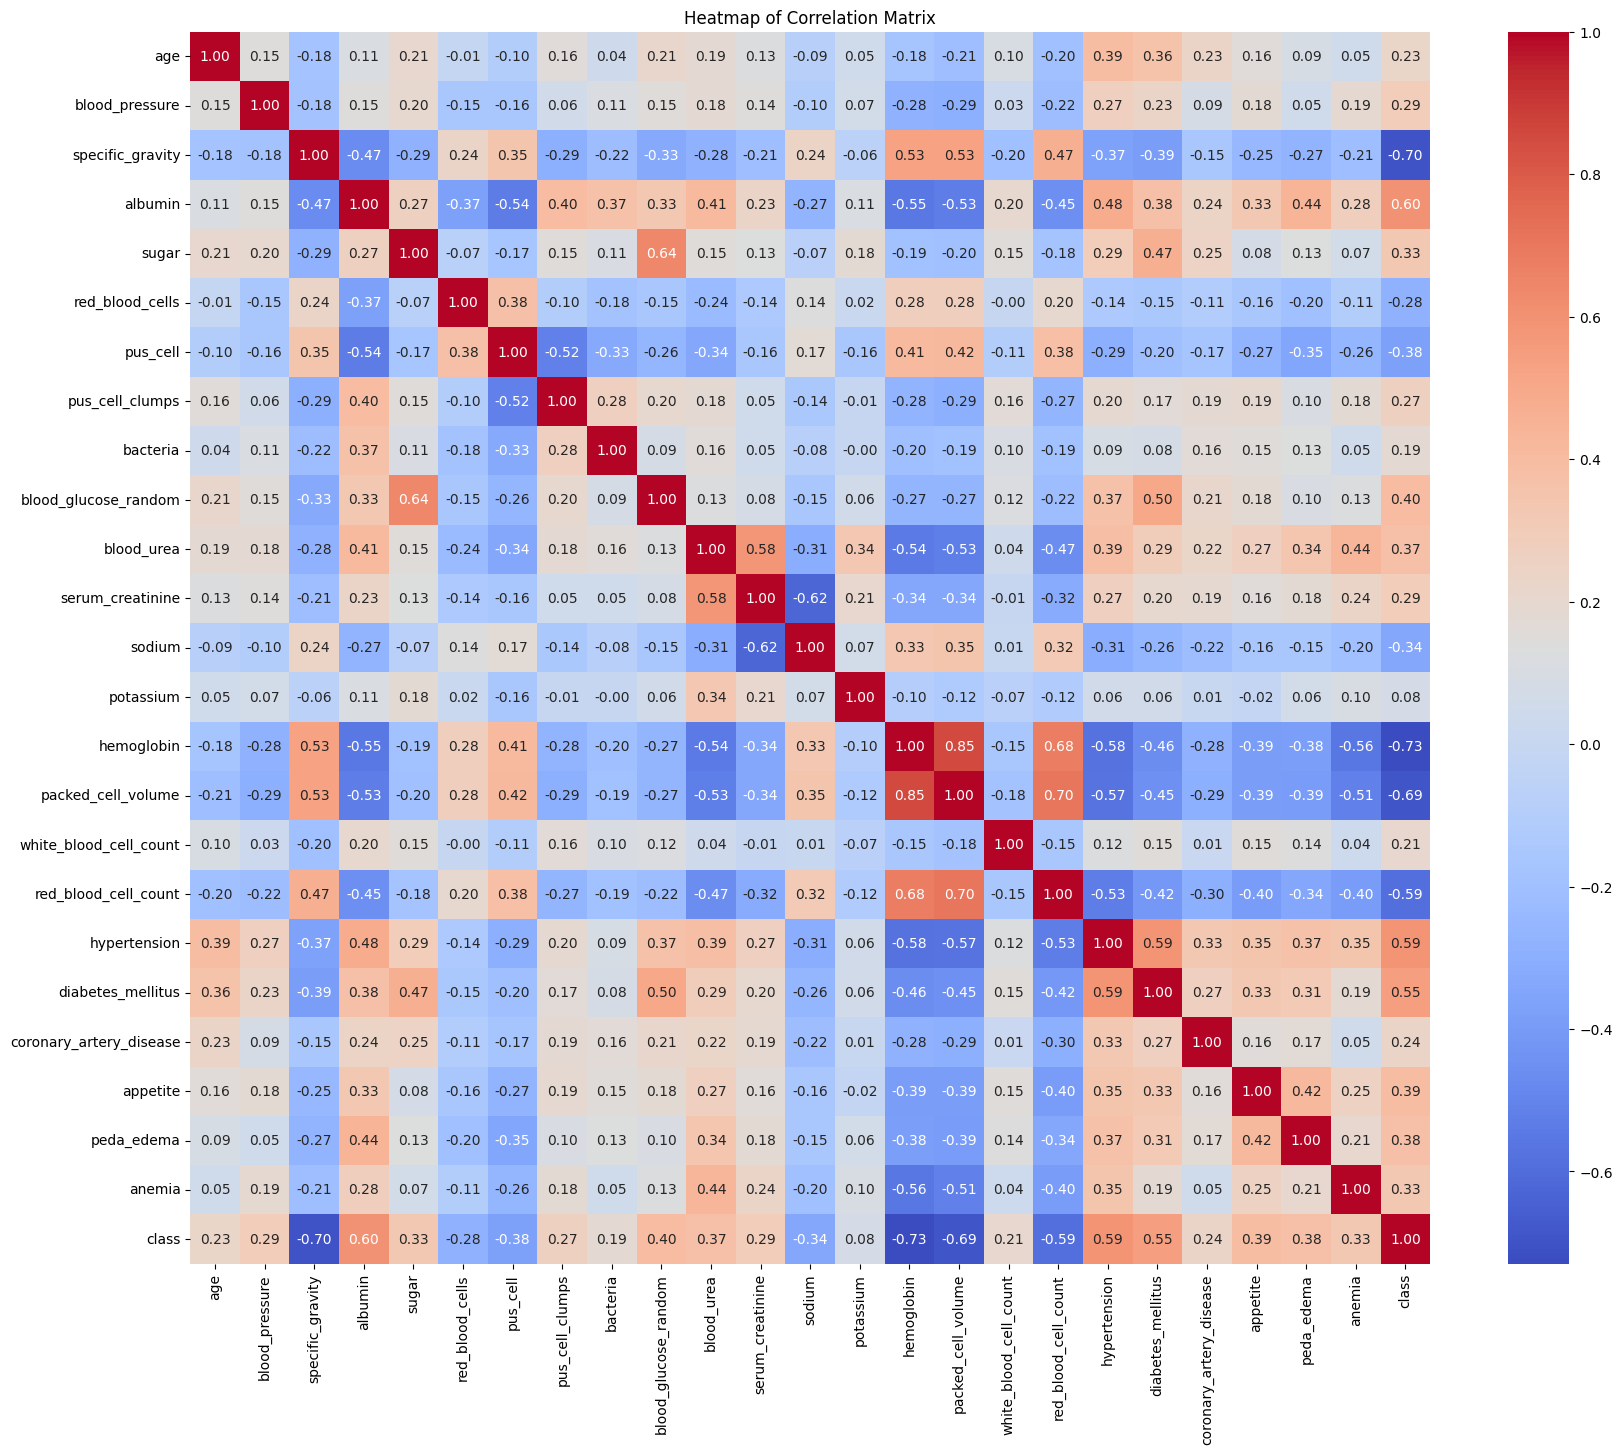

In [120]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## **Feature Selection**

In [121]:
# Select the specified features for modeling
selected_features = [
    'serum_creatinine',
    'hemoglobin',
    'packed_cell_volume',
    'red_blood_cell_count',
    'albumin',
    'blood_urea',
    'blood_glucose_random',
    'diabetes_mellitus',
    'anemia',
    'appetite',
    'peda_edema'
]



## **Splitting Data into 70% Train and 30% Test**

In [122]:
X = data[selected_features]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Train Model with XGBoost, AdaBoost, Random Forest, KNN, and SVM**

In [123]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [124]:
# Train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [125]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
# Training SVM model
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

## **Hard Voting with 5 Base Models**

In [128]:
ensemble = EnsembleVoteClassifier(
    clfs=[rf_model, svm_model, knn_model, ada_model, xgb_model],
    voting='hard'
)

ensemble.fit(X_train.values, y_train.values)

c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


EnsembleVoteClassifier(clfs=[RandomForestClassifier(random_state=42),
                             SVC(class_weight='balanced', random_state=42),
                             KNeighborsClassifier(),
                             AdaBoostClassifier(random_state=42),
                             XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_catego...
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...)])

## **Stacking with meta data and vote data**

In [129]:
rf_pred = rf_model.predict(X_train)
svm_pred = svm_model.predict(X_train)
knn_pred = knn_model.predict(X_train)
ada_pred = ada_model.predict(X_train)
xgb_pred = xgb_model.predict(X_train)
vote_pred = ensemble.predict(X_train)

# Combine all prediction as a features for meta model
import numpy as np
meta_X_train = np.column_stack((rf_pred, svm_pred, knn_pred, ada_pred, xgb_pred, vote_pred))

c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [130]:
rf_test = rf_model.predict(X_test)
svm_test = svm_model.predict(X_test)
knn_test = knn_model.predict(X_test)
ada_test = ada_model.predict(X_test)
xgb_test = xgb_model.predict(X_test)
vote_test = ensemble.predict(X_test)

meta_X_test = np.column_stack((rf_test, svm_test, knn_test, ada_test, xgb_test, vote_test))


c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [131]:
from sklearn.linear_model import LogisticRegression

# Meta-classifier
meta_model = LogisticRegression()
meta_model.fit(meta_X_train, y_train)

# Prediksi
meta_pred = meta_model.predict(meta_X_test)

print("Stacked Ensemble Accuracy:", accuracy_score(y_test, meta_pred))
print("Recall Score:", recall_score(y_test, meta_pred))
print("F1 Score:", f1_score(y_test, meta_pred))
print("Classification Report:\n", classification_report(y_test, meta_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, meta_pred))

Stacked Ensemble Accuracy: 0.9916666666666667
Recall Score: 0.9868421052631579
F1 Score: 0.9933774834437086
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix:
 [[44  0]
 [ 1 75]]


In [133]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score
import numpy as np

# Cek apakah X dan y sudah dalam format final (fitur dan target)
# Jika belum, ganti X dan y sesuai variabel Anda

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

results = cross_validate(meta_model, X, y, cv=cv, scoring=scoring)

print("Cross-validation results:")
print(f"Accuracy: {np.mean(results['test_accuracy']):.4f} ± {np.std(results['test_accuracy']):.4f}")
print(f"Recall:   {np.mean(results['test_recall']):.4f} ± {np.std(results['test_recall']):.4f}")
print(f"F1 Score: {np.mean(results['test_f1']):.4f} ± {np.std(results['test_f1']):.4f}")


Cross-validation results:
Accuracy: 0.9750 ± 0.0209
Recall:   0.9720 ± 0.0349
F1 Score: 0.9795 ± 0.0174


c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\chels\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st